# Assignment M5.2 (Python)

#Problem P1

Consider the following system of equations:
\begin{align*}
-7& &x_{2}+5x_3 = 50\\
4& &x_2+7x_{3}=-30 \\
-4x_1+3& &x_2-7x_{3}= 40 \\
\end{align*}


1. Use python to solve for the unknowns $x_1, x_2$ and $x_3$.
2. Use python to compute transpose and the inverse of the coefficient matrix $A$. Verify that $AA^{-1}=I$, where $I$ is the identity matrix.
3. Use python to verify that the coefficient matrix multiplied by the unknown vector results in the right hand side vector.




In [41]:
# P1 Answer
import numpy as np

A = np.array([[0, -7, 5],[0, 4, 7], [-4,3,-7]])
b = np.array([[50],[-30], [40]])

x = np.linalg.solve(A, b)
print(f"x={x}")

Ainv = np.linalg.inv(A)
print(Ainv)
I = np.dot(A, Ainv)
print(f"I={I}")

b_test = np.dot(A, x)
print(f"Ax={b_test}")



x=[[-15.18115942]
 [ -7.24637681]
 [ -0.14492754]]
[[-0.17753623 -0.12318841 -0.25      ]
 [-0.10144928  0.07246377  0.        ]
 [ 0.05797101  0.10144928  0.        ]]
I=[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.55111512e-17  1.00000000e+00  0.00000000e+00]
 [ 5.55111512e-17  0.00000000e+00  1.00000000e+00]]
Ax=[[ 50.]
 [-30.]
 [ 40.]]


#Problem P2
Develop your own python function with template below to obtain the transpose of a matrix $[\ ]^T$. Apply your function to transpose the following matrices. Compare your results with python built-in transpose operator (`.T`). Find the product $[B]^T[A]^T$.
\begin{equation}[A]=
\begin{bmatrix}
6 & -1  \\
12 & 8 \\
-5 & 4 \\
\end{bmatrix}
\end{equation}


\begin{equation}[B]=
\begin{bmatrix}
4 & 0  \\
0.5 & 2 \\
\end{bmatrix}
\end{equation}


In [25]:
# P2 Answer
import numpy as np
import copy
def myTranspose(A):
  """
  Finds transpose of a matrix

  myTranspose(A)
  Finds transpose of a matrix by switching rows and columns
  Input:
    A: a matrix
  Output
    AT: tranpose of A
  """
  AT = np.zeros((len(A[0]), len(A)))
  for i in range(len(A)):
    for j in range(len(A[0])):
      AT[j,i] = A[i,j]
      

  return AT

A = np.array([[6,-1],
              [12,8],
              [-5,4]])
AT = myTranspose(A) #calling my transpose for A
AT2 = np.transpose(A)
print(AT)
print(AT2)

B = np.array([[4,0],
             [0.5,2]])
BT = np.transpose(B)

C = np.dot(BT, AT2)
print(C)







[[ 6. 12. -5.]
 [-1.  8.  4.]]
[[ 6 12 -5]
 [-1  8  4]]
[[ 23.5  52.  -18. ]
 [ -2.   16.    8. ]]


#Problem P3
The diagram shows five mixing vessels connected by pipes.
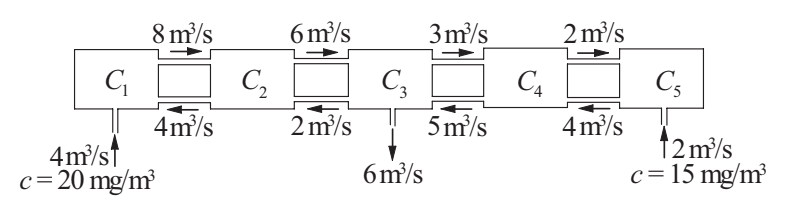


Water is pumped through the pipes at the steady rates shown on the diagram. The incoming water contains a chemical, the amount of which is specified by its concentration $c\,[\rm{mg/m^3}]$. Applying the principle of conservation of mass to each vessel, we obtain the following simultaneous equations for the concentrations $c_i$ within the vessels. The mass flow rate of the chemical is obtained by multiplying the volume flow rate of the water by the concentration.

\begin{align*}
& &-8c_1 + 4c_2 = -80\\
& &8c_1 - 10c_2 + 2c_3 = 0\\
& &6c_2 - 11c_3 + 5c_4 = 0 \\
& &3c_3 - 7c_4 + 4c_5 = 0 \\
& &2c_4 - 4c_5 = -30
\end{align*}

1. Determine the concentrations $c_1$ to $c_5$.
2. Use python to verify that the coefficient matrix multiplied by the unknown vector results in the right hand side vector.



In [31]:
# P3 answer
C = np.array([[-8, 4,0,0,0],
              [8,-10,2,0,0],
              [0,6,-11,5,0],
              [0,0,3,-7,4],
              [0,0,0,2,-4]])
b = np.transpose(np.array([[-80,0,0,0,-30]]))

x = np.linalg.solve(C, b)
print(x)

print(np.dot(C, x))

[[19.72222222]
 [19.44444444]
 [18.33333333]
 [17.        ]
 [16.        ]]
[[-8.00000000e+01]
 [ 7.10542736e-15]
 [-1.42108547e-14]
 [ 2.84217094e-14]
 [-3.00000000e+01]]


#Problem P4
The two pendulums are connected by a spring that is undeformed when the pendulums are vertical.

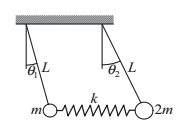


The equations of motion of the system can be shown to be
$$
k L(\theta_2 - \theta_2) - mg\theta_1 = mL\ddot{\theta_1}
$$
$$
-k L(\theta_2 - \theta_2) - 2mg\theta_2 = 2mL\ddot{\theta_2}
$$
where $\theta_1$ and $\theta_2$are the angular displacements and $k$ is the spring stiffness.
These equation can be expressed as an eigenvalue problem $(\mathbf{A}-\lambda \mathbf{I})\mathbf{x}=0$, where $\lambda$ and $\mathbf{x}$ are eigenvalues and eigenvectors, respectively. The coefficient matrix is

$A=\begin{bmatrix}
1+mg/(kL)  & -1 \\
-1/2 & 1/2+mg/(kL)
\end{bmatrix}$ and $x=\begin{bmatrix}
x_1\\
x_2
\end{bmatrix}$ is the amplitude of
the angular displacement (in m). Eigenvalues are $\lambda = \omega^2 \frac{m}{k}$ where $\omega$ is the angular frequency (in rad/s). Use $m = 0.25\,\rm{kg}$, $k = 20\,\rm{ N/m}$, $ L = 0.75\, \rm{m}$, and  $g = 9.80665\,\rm{m/s^2}$.

Determine the angular frequencies of vibration [rad/s] and the  amplitudes of the angular displacements [m].


In [42]:
#P4 Answer
import math
m = 0.25
k = 20
L = 0.75
g = 9.80665

A = np.array([[1+m*g/k/L, -1], [-0.5, 0.5+m*g/k/L]])
sol = np.linalg.eig(A)
w2 = sol.eigenvalues
amps = sol.eigenvectors
    
print(w2)

print(amps)

[1.66344417 0.16344417]
[[ 0.89442719  0.70710678]
 [-0.4472136   0.70710678]]
